In [533]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import lag_plot
from sklearn.preprocessing import LabelEncoder

In [345]:
#I have to use this format in order to keep 'observation_date' as the index
fred = pd.read_csv('data/fred.csv',  parse_dates=["observation_date"]) 
fred.set_index("observation_date", inplace=True)
fred.index = fred.index.date
weather = pd.read_csv('data/weather.csv',  parse_dates=["observation_date"])
weather.set_index("observation_date", inplace=True)
weather.index = weather.index.date

In [347]:
fred.rename(columns={'GDPC1':'GDP'}, inplace=True)

In [349]:
fred.head()

,GDP,ICSA,Inflation,UNRATE
1967-01-07,4870.299,208000.0,2.772786,3.9
1967-01-08,4870.299,208000.0,2.772786,3.9
1967-01-09,4870.299,208000.0,2.772786,3.9
1967-01-10,4870.299,208000.0,2.772786,3.9
1967-01-11,4870.299,208000.0,2.772786,3.9


In [351]:
weather.head()

,State,Event Type,Property Damage,Total Injuries and Deaths
1950-04-28,OKLAHOMA,Tornado,250K,0
1950-04-29,TEXAS,Tornado,25K,0
1950-07-05,PENNSYLVANIA,Tornado,25K,2
1950-07-05,PENNSYLVANIA,Tornado,2.5K,0
1950-07-24,PENNSYLVANIA,Tornado,2.5K,0


I'm going to make sure everything looks good before breaking out some graphs!


In [354]:
fred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20814 entries, 1967-01-07 to 2024-01-01
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GDP        20814 non-null  float64
 1   ICSA       20814 non-null  float64
 2   Inflation  20814 non-null  float64
 3   UNRATE     20814 non-null  float64
dtypes: float64(4)
memory usage: 813.0+ KB


In [356]:
print(f"Rows: {fred.shape[0]}")
print(f"Columns: {fred.shape[1]}")

Rows: 20814
Columns: 4


In [358]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168870 entries, 1950-04-28 to 2021-06-13
Data columns (total 4 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   State                      1168870 non-null  object
 1   Event Type                 1168870 non-null  object
 2   Property Damage            1168870 non-null  object
 3   Total Injuries and Deaths  1168870 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 44.6+ MB


In [360]:
print(f"Rows: {weather.shape[0]}")
print(f"Columns: {weather.shape[1]}")

Rows: 1168870
Columns: 4


Making a function that takes the letter symbol, makes it lower case, removes the symbol, and adds the correct number of zeros to the end so i can convert it to an integer.

In [363]:
def convert_letter(val):
    if isinstance(val, str): 
        val = val.strip().lower()
        try:
            if len(val) == 0: 
                return 0
            elif val == 'k':
                return 1_000
            elif val == 'm':
                return 1_000_000
            elif val == 'b':
                return 1_000_000_000
            elif val.endswith('k'):
                return int(float(val[:-1]) * 1_000)
            elif val.endswith('m'):
                return int(float(val[:-1]) * 1_000_000)
            elif val.endswith('b'):
                return int(float(val[:-1]) * 1_000_000_000)
            else:
                return float(val)
        except ValueError:
            return np.nan 
    elif isinstance(val, (int, float)):
        return val
    elif val is None:
        return np.nan
    else:
        return np.nan


In [365]:
weather['Property Damage'] = weather['Property Damage'].apply(convert_letter)

In [366]:
weather.head()

,State,Event Type,Property Damage,Total Injuries and Deaths
1950-04-28,OKLAHOMA,Tornado,250000.0,0
1950-04-29,TEXAS,Tornado,25000.0,0
1950-07-05,PENNSYLVANIA,Tornado,25000.0,2
1950-07-05,PENNSYLVANIA,Tornado,2500.0,0
1950-07-24,PENNSYLVANIA,Tornado,2500.0,0


In [369]:
weather['Property Damage'].isnull().sum()

6

In [371]:
weather['Property Damage'] = weather['Property Damage'].fillna(0)

In [373]:
#Checking if there are any NaN values for 'Property Damage'
weather['Property Damage'].isnull().sum()


0

In [375]:
weather.isnull().sum()

State                        0
Event Type                   0
Property Damage              0
Total Injuries and Deaths    0
dtype: int64

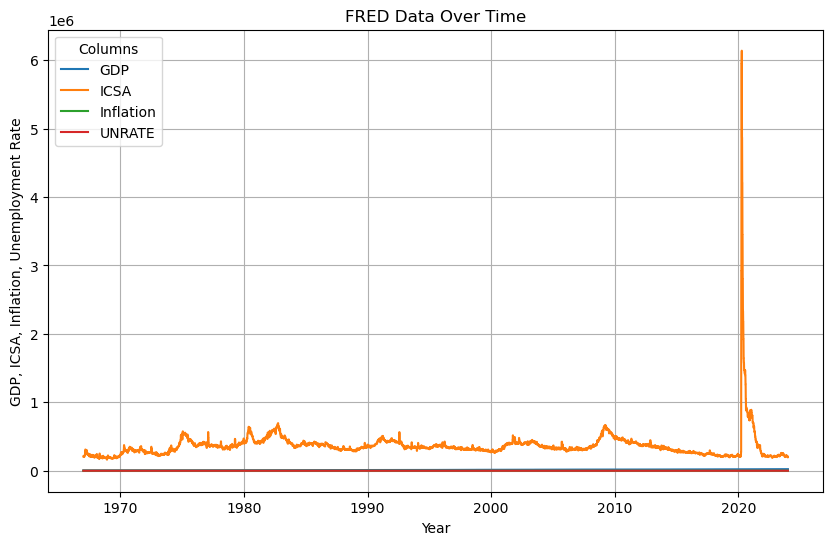

In [377]:
fred.plot(figsize=(10, 6)) 
plt.title('FRED Data Over Time') 
plt.xlabel('Year')
plt.ylabel('GDP, ICSA, Inflation, Unemployment Rate') 
plt.legend(title='Columns')
plt.grid(True) 
plt.show()

There seems to be little variation in everything except ICSA. I will explore further below. 

In [380]:
fred['GDP'].unique().sum()

2836840.907

In [382]:
print(f'ICSA min: {fred['ICSA'].min()}') 
print(f'ICSA max: {fred['ICSA'].max()}')

ICSA min: 162000.0
ICSA max: 6137000.0


In [384]:
print(f'GDP min: {fred['GDP'].min()}')
print(f'GDP max: {fred['GDP'].max()}')

GDP min: 4870.299
GDP max: 23053.545


The values for the other columns are much smaller. That's why it looks like they aren't changing in the graph above. 

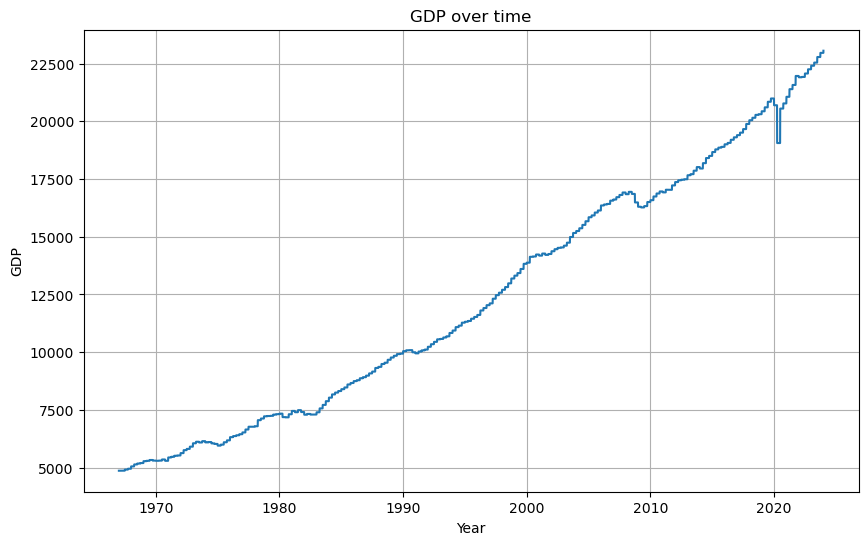

In [387]:
fred['GDP'].plot(figsize=(10,6))
plt.title('GDP over time')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.grid(True) 
plt.show()

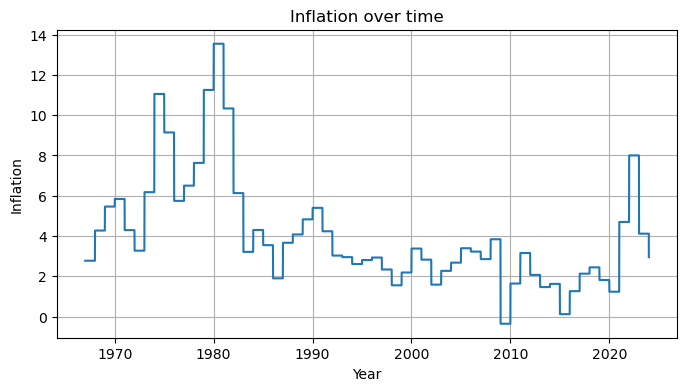

In [389]:
fred['Inflation'].plot(figsize=(8,4))
plt.title('Inflation over time')
plt.xlabel('Year')
plt.ylabel('Inflation')
plt.grid(True) 
plt.show()

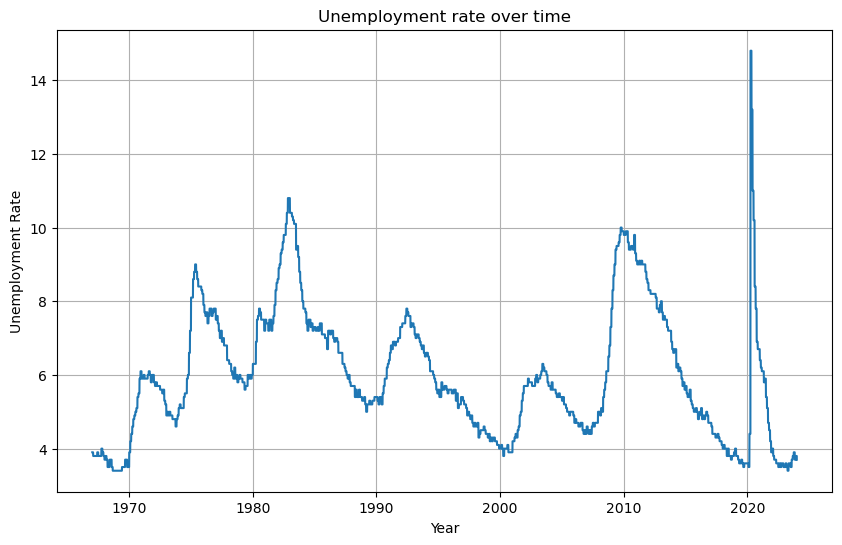

In [391]:
fred['UNRATE'].plot(figsize=(10,6))
plt.title('Unemployment rate over time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.grid(True) 
plt.show()

In [404]:
print(f"Unemployment rate has its highest value on the date {fred['UNRATE'].idxmax()} and its lowest value on the date {fred['UNRATE'].idxmin()}.")

Unemployment rate has its highest value on the date 2020-04-01 and its lowest value on the date 1968-09-01.


I'm going to repeat the previous line of code to see if there are any overlaping min and max dates. 

In [402]:
print(f"GDP has its highest value on the date {fred['GDP'].idxmax()} and its lowest value on the date {fred['GDP'].idxmin()}.")

GDP has its highest value on the date 2024-01-01 and its lowest value on the date 1967-01-07.


In [406]:
print(f"ICSA has its highest value on the date {fred['ICSA'].idxmax()} and its lowest value on the date {fred['ICSA'].idxmin()}.")

ICSA has its highest value on the date 2020-04-04 and its lowest value on the date 1968-11-30.


In [408]:
print(f"Inflation has its highest value on the date {fred['Inflation'].idxmax()} and its lowest value on the date {fred['Inflation'].idxmin()}.")

Inflation has its highest value on the date 1980-01-01 and its lowest value on the date 2009-01-01.


There are a few dates that are very close to one another. Unemployment rate and ICSA both have their highest value in the first half of 2020. This makes sense because the ICSA is an index of initial unemployment claims. Sharp increases in the ICSA can indicate a significant event while the unemployment rate itself shows the possible lasting impact of the event. The lowest are also at close time intervals. Later on I will be exploring drastic declines/increases instead of just minimum and maximum values. The S&P500 index on the FRED website only has observations dating back to 2015. We will be using this data, but I will add it after looking at some of the previous years' data. 

I added several more tables to the main dataframe. I will edit and explore them more here. 

In [456]:
fred2 = pd.read_csv('fred_tot.csv', parse_dates=["observation_date"]) 
fred2.set_index("observation_date", inplace=True)
fred2.index = fred2.index.date

In [458]:
fred2.head()

,GDPC1,ICSA,Inflation,UNRATE,EXPGS,SP500,DRCCLACBS,DTWEXBGS,FEDFUNDS,IMPGS,INDPRO,PERMIT,TCU,VIXCLS
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.7520,22.55
2016-01-01,19001.690,276000.0,1.261583,4.8,2181.957,2043.94,2.15,113.3429,0.34,2693.639,99.4391,1171.0,76.2263,18.21
2016-04-01,19062.709,271000.0,1.261583,5.1,2221.936,2072.78,2.21,110.2977,0.37,2711.306,98.4775,1160.0,75.4701,13.10
2016-07-01,19197.938,262000.0,1.261583,4.8,2270.000,2102.95,2.29,111.6509,0.39,2751.229,98.8452,1198.0,75.6916,14.77
2018-01-01,20044.077,248000.0,2.442583,4.0,2517.268,2673.61,2.50,110.0783,1.41,3093.299,101.4852,1317.0,78.4548,11.04


In [460]:
fred2.rename(columns={'GDPC1':'GDP'}, inplace=True)
fred2.head()

,GDP,ICSA,Inflation,UNRATE,EXPGS,SP500,DRCCLACBS,DTWEXBGS,FEDFUNDS,IMPGS,INDPRO,PERMIT,TCU,VIXCLS
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.7520,22.55
2016-01-01,19001.690,276000.0,1.261583,4.8,2181.957,2043.94,2.15,113.3429,0.34,2693.639,99.4391,1171.0,76.2263,18.21
2016-04-01,19062.709,271000.0,1.261583,5.1,2221.936,2072.78,2.21,110.2977,0.37,2711.306,98.4775,1160.0,75.4701,13.10
2016-07-01,19197.938,262000.0,1.261583,4.8,2270.000,2102.95,2.29,111.6509,0.39,2751.229,98.8452,1198.0,75.6916,14.77
2018-01-01,20044.077,248000.0,2.442583,4.0,2517.268,2673.61,2.50,110.0783,1.41,3093.299,101.4852,1317.0,78.4548,11.04


In [462]:
fred2.isnull().sum()

GDP          0
ICSA         0
Inflation    0
UNRATE       0
EXPGS        0
SP500        0
DRCCLACBS    0
DTWEXBGS     0
FEDFUNDS     0
IMPGS        0
INDPRO       0
PERMIT       0
TCU          0
VIXCLS       0
dtype: int64

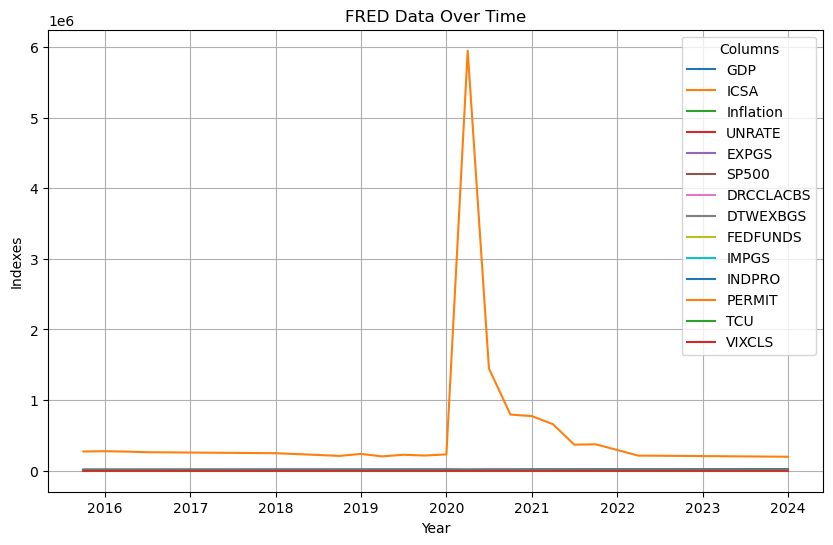

In [464]:
fred2.plot(figsize=(10, 6)) 
plt.title('FRED Data Over Time') 
plt.xlabel('Year')
plt.ylabel('Indexes') 
plt.legend(title='Columns')
plt.grid(True) 
plt.show()

Same as last time. I will make individual graphs for each column. 

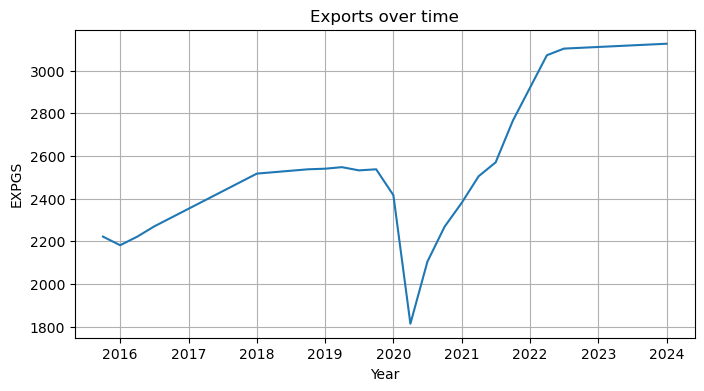

In [467]:
fred2['EXPGS'].plot(figsize=(8,4))
plt.title('Exports over time')
plt.xlabel('Year')
plt.ylabel('EXPGS')
plt.grid(True) 
plt.show()

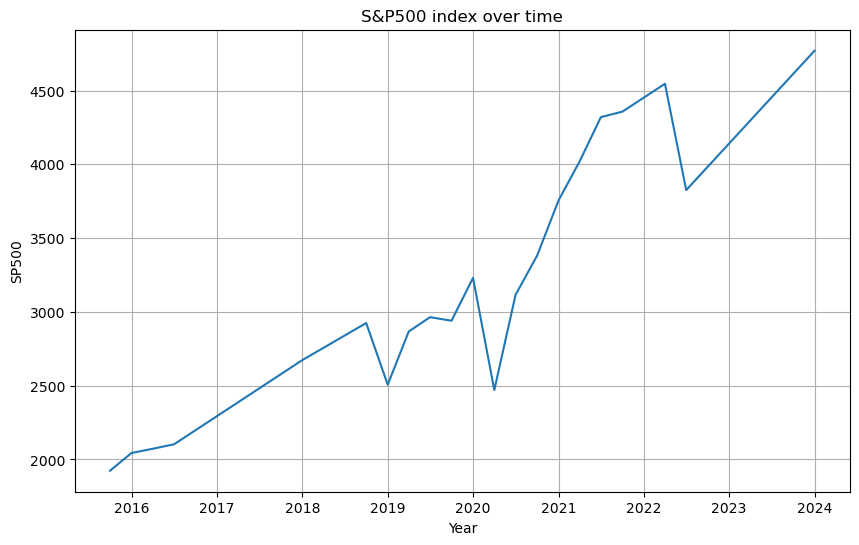

In [469]:
fred2['SP500'].plot(figsize=(10,6))
plt.title('S&P500 index over time')
plt.xlabel('Year')
plt.ylabel('SP500')
plt.grid(True) 
plt.show()

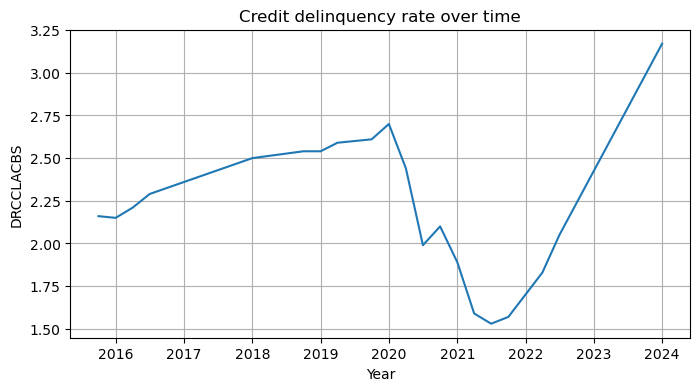

In [471]:
fred2['DRCCLACBS'].plot(figsize=(8,4))
plt.title('Credit delinquency rate over time')
plt.xlabel('Year')
plt.ylabel('DRCCLACBS')
plt.grid(True) 
plt.show()

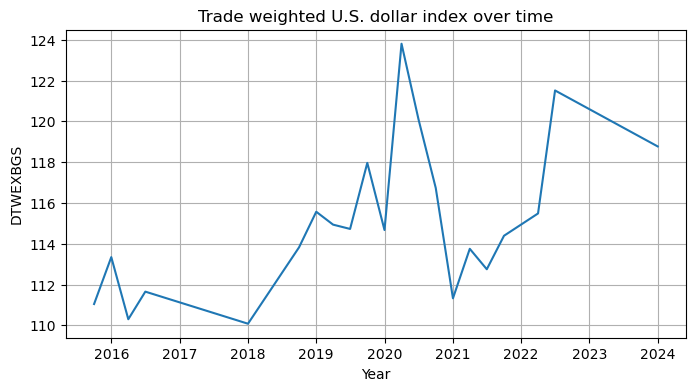

In [472]:
fred2['DTWEXBGS'].plot(figsize=(8,4))
plt.title('Trade weighted U.S. dollar index over time')
plt.xlabel('Year')
plt.ylabel('DTWEXBGS')
plt.grid(True) 
plt.show()

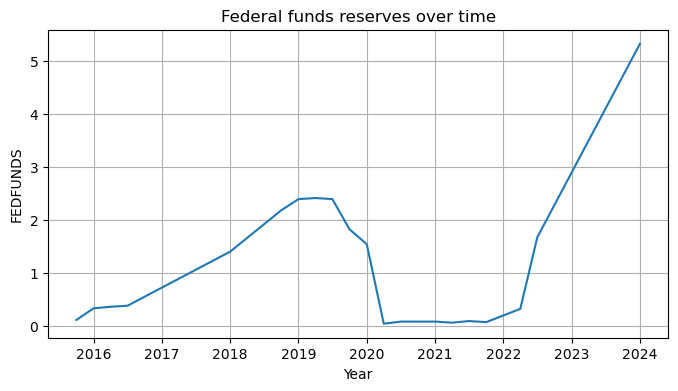

In [473]:
fred2['FEDFUNDS'].plot(figsize=(8,4))
plt.title('Federal funds reserves over time')
plt.xlabel('Year')
plt.ylabel('FEDFUNDS')
plt.grid(True) 
plt.show()

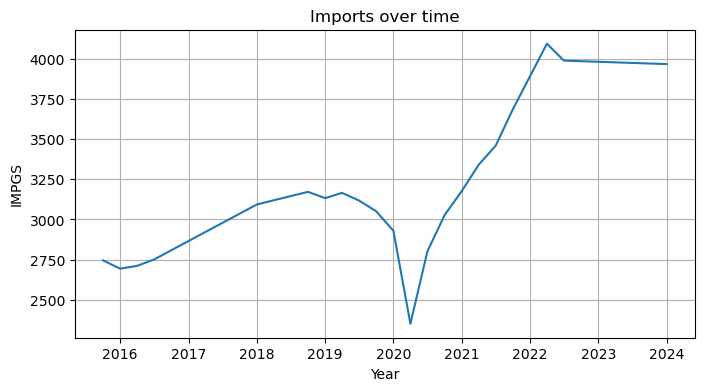

In [474]:
fred2['IMPGS'].plot(figsize=(8,4))
plt.title('Imports over time')
plt.xlabel('Year')
plt.ylabel('IMPGS')
plt.grid(True) 
plt.show()

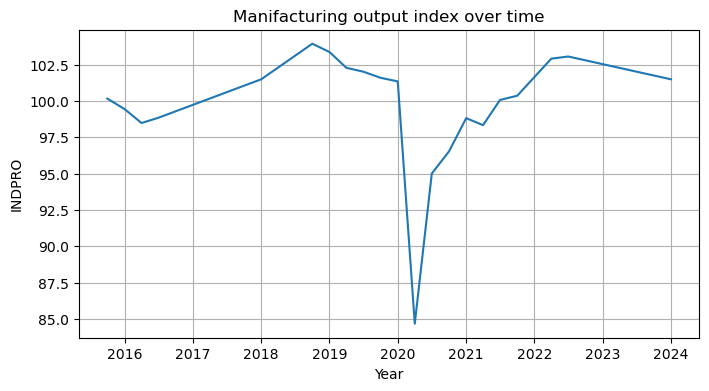

In [475]:
fred2['INDPRO'].plot(figsize=(8,4))
plt.title('Manifacturing output index over time')
plt.xlabel('Year')
plt.ylabel('INDPRO')
plt.grid(True) 
plt.show()

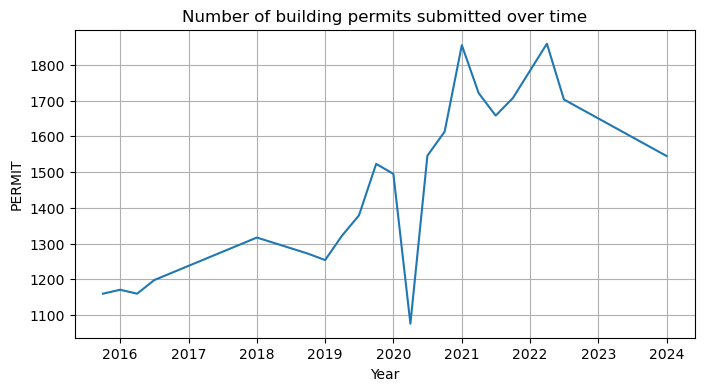

In [477]:
fred2['PERMIT'].plot(figsize=(8,4))
plt.title('Number of building permits submitted over time')
plt.xlabel('Year')
plt.ylabel('PERMIT')
plt.grid(True) 
plt.show()

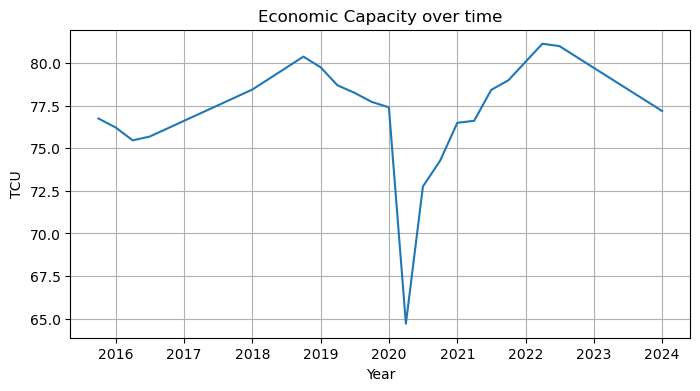

In [483]:
fred2['TCU'].plot(figsize=(8,4))
plt.title('Economic Capacity over time')
plt.xlabel('Year')
plt.ylabel('TCU')
plt.grid(True) 
plt.show()

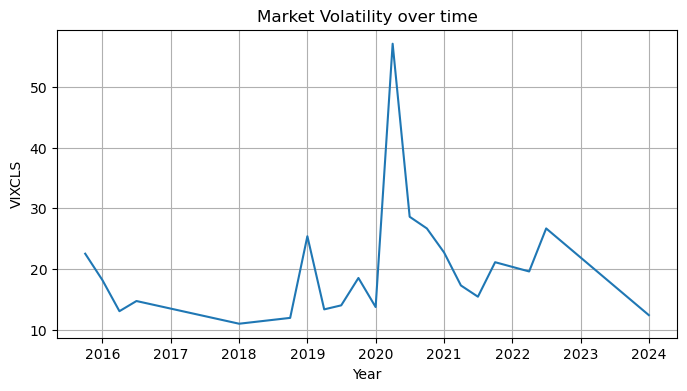

In [485]:
fred2['VIXCLS'].plot(figsize=(8,4))
plt.title('Market Volatility over time')
plt.xlabel('Year')
plt.ylabel('VIXCLS')
plt.grid(True) 
plt.show()

We already see a big market response in 2020. This is most likely due to covid-19 closures, which started in 2020. Our S&P500 data begins in 2015. The new table is adjusted to this. The rest of our analysis will begin in 2015. 

<Axes: xlabel='year', ylabel='month'>

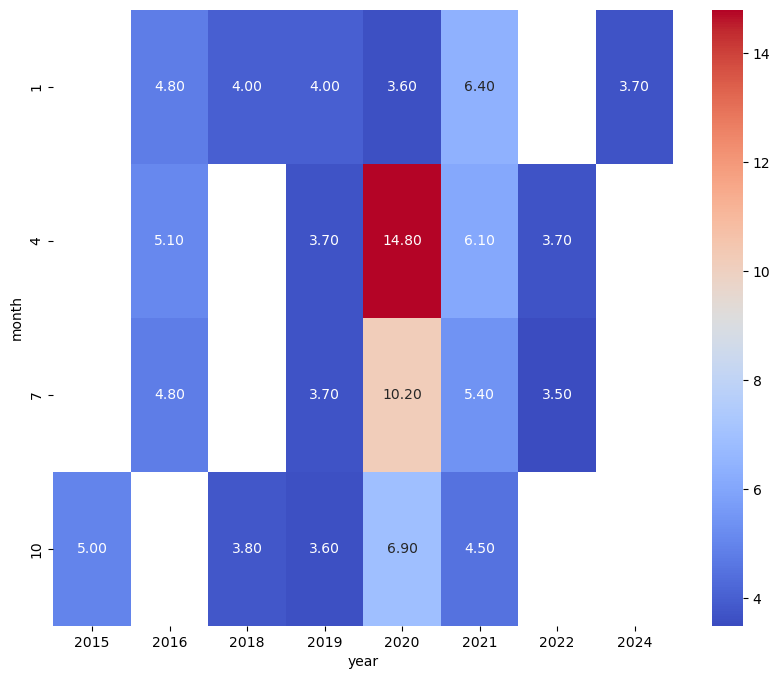

In [501]:
fred2.index = pd.to_datetime(fred2.index)

fred2['year'] = fred2.index.year
fred2['month'] = fred2.index.month
plt.figure(figsize=(10,8))
pivot = fred2.pivot_table(index='month', columns='year', values='UNRATE')
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".2f")


Still seeing results of the covid-19 shutdown in 2020 and 2021. 

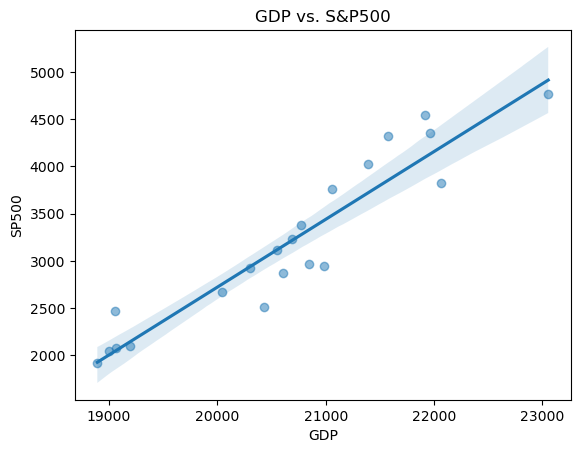

In [508]:
sns.regplot(x='GDP', y='SP500', data=fred2, scatter_kws={'alpha':0.5})
plt.title('GDP vs. S&P500')
plt.show()

The plot above reinforces the postive relationship between the S&P500 index and GDP. 

In [525]:
combined = pd.merge(fred2, weather, left_index=True, right_index=True, how='inner')
combined.head()

,GDP,ICSA,Inflation,UNRATE,EXPGS,SP500,DRCCLACBS,DTWEXBGS,FEDFUNDS,IMPGS,INDPRO,PERMIT,TCU,VIXCLS,year,month,State,Event Type,Property Damage,Total Injuries and Deaths
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015,10,LOUISIANA,Drought,0.0,0
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015,10,ALASKA,High Wind,0.0,0
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015,10,MISSISSIPPI,Drought,0.0,0
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015,10,MISSISSIPPI,Drought,0.0,0
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015,10,MISSISSIPPI,Drought,0.0,0


In [527]:
combined.drop(columns= 'State', inplace=True) 

In [529]:
combined.head()

,GDP,ICSA,Inflation,UNRATE,EXPGS,SP500,DRCCLACBS,DTWEXBGS,FEDFUNDS,IMPGS,INDPRO,PERMIT,TCU,VIXCLS,year,month,Event Type,Property Damage,Total Injuries and Deaths
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015,10,Drought,0.0,0
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015,10,High Wind,0.0,0
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015,10,Drought,0.0,0
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015,10,Drought,0.0,0
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015,10,Drought,0.0,0


In [531]:
combined['Event Type'].unique()

array(['Drought', 'High Wind', 'Wildfire', 'Strong Wind', 'Rip Current',
       'Marine Thunderstorm Wind', 'Flash Flood', 'Lightning',
       'Waterspout', 'Tornado', 'Thunderstorm Wind', 'Hail', 'Flood',
       'Heavy Rain', 'Lake-Effect Snow', 'Winter Weather',
       'Extreme Cold/Wind Chill', 'Frost/Freeze', 'Dense Fog',
       'High Surf', 'Avalanche', 'Astronomical Low Tide', 'Funnel Cloud',
       'Dust Storm', 'Debris Flow', 'Cold/Wind Chill', 'Sleet',
       'Blizzard', 'Heavy Snow', 'Winter Storm', 'Ice Storm',
       'Dust Devil', 'Lakeshore Flood', 'Heat', 'Coastal Flood',
       'Excessive Heat'], dtype=object)

I want to add numeric values to these non numeric entries so that I can use them when modeling. 

In [548]:
le = LabelEncoder()
combined['Event_Type'] = le.fit_transform(combined['Event Type'])
legend = pd.DataFrame({
    'Encoded_Value': range(len(le.classes_)),
    'Original_Label': le.classes_
})
print(legend)

    Encoded_Value            Original_Label
0               0     Astronomical Low Tide
1               1                 Avalanche
2               2                  Blizzard
3               3             Coastal Flood
4               4           Cold/Wind Chill
5               5               Debris Flow
6               6                 Dense Fog
7               7                   Drought
8               8                Dust Devil
9               9                Dust Storm
10             10            Excessive Heat
11             11   Extreme Cold/Wind Chill
12             12               Flash Flood
13             13                     Flood
14             14              Frost/Freeze
15             15              Funnel Cloud
16             16                      Hail
17             17                      Heat
18             18                Heavy Rain
19             19                Heavy Snow
20             20                 High Surf
21             21               

Here is a legend of the encoded values and their labels!

In [551]:
combined.head()

,GDP,ICSA,Inflation,UNRATE,EXPGS,SP500,DRCCLACBS,DTWEXBGS,FEDFUNDS,IMPGS,INDPRO,PERMIT,TCU,VIXCLS,year,month,Event Type,Property Damage,Total Injuries and Deaths,Event_Type
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015,10,Drought,0.0,0,7
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015,10,High Wind,0.0,0,21
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015,10,Drought,0.0,0,7
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015,10,Drought,0.0,0,7
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015,10,Drought,0.0,0,7


In [555]:
combined_final = combined.drop('Event Type', axis=1) 


In [557]:
combined_final.head()

,GDP,ICSA,Inflation,UNRATE,EXPGS,SP500,DRCCLACBS,DTWEXBGS,FEDFUNDS,IMPGS,INDPRO,PERMIT,TCU,VIXCLS,year,month,Property Damage,Total Injuries and Deaths,Event_Type
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015,10,0.0,0,7
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015,10,0.0,0,21
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015,10,0.0,0,7
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015,10,0.0,0,7
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015,10,0.0,0,7


In [559]:
combined_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4483 entries, 2015-10-01 to 2021-07-01
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GDP                        4483 non-null   float64
 1   ICSA                       4483 non-null   float64
 2   Inflation                  4483 non-null   float64
 3   UNRATE                     4483 non-null   float64
 4   EXPGS                      4483 non-null   float64
 5   SP500                      4483 non-null   float64
 6   DRCCLACBS                  4483 non-null   float64
 7   DTWEXBGS                   4483 non-null   float64
 8   FEDFUNDS                   4483 non-null   float64
 9   IMPGS                      4483 non-null   float64
 10  INDPRO                     4483 non-null   float64
 11  PERMIT                     4483 non-null   float64
 12  TCU                        4483 non-null   float64
 13  VIXCLS                     448

In [563]:
combined_final = combined_final.astype('float')

In [565]:
combined_final.head(3)

,GDP,ICSA,Inflation,UNRATE,EXPGS,SP500,DRCCLACBS,DTWEXBGS,FEDFUNDS,IMPGS,INDPRO,PERMIT,TCU,VIXCLS,year,month,Property Damage,Total Injuries and Deaths,Event_Type
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015.0,10.0,0.0,0.0,7.0
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015.0,10.0,0.0,0.0,21.0
2015-10-01,18892.206,272000.0,0.118627,5.0,2222.279,1923.82,2.16,111.0439,0.12,2745.517,100.1563,1160.0,76.752,22.55,2015.0,10.0,0.0,0.0,7.0


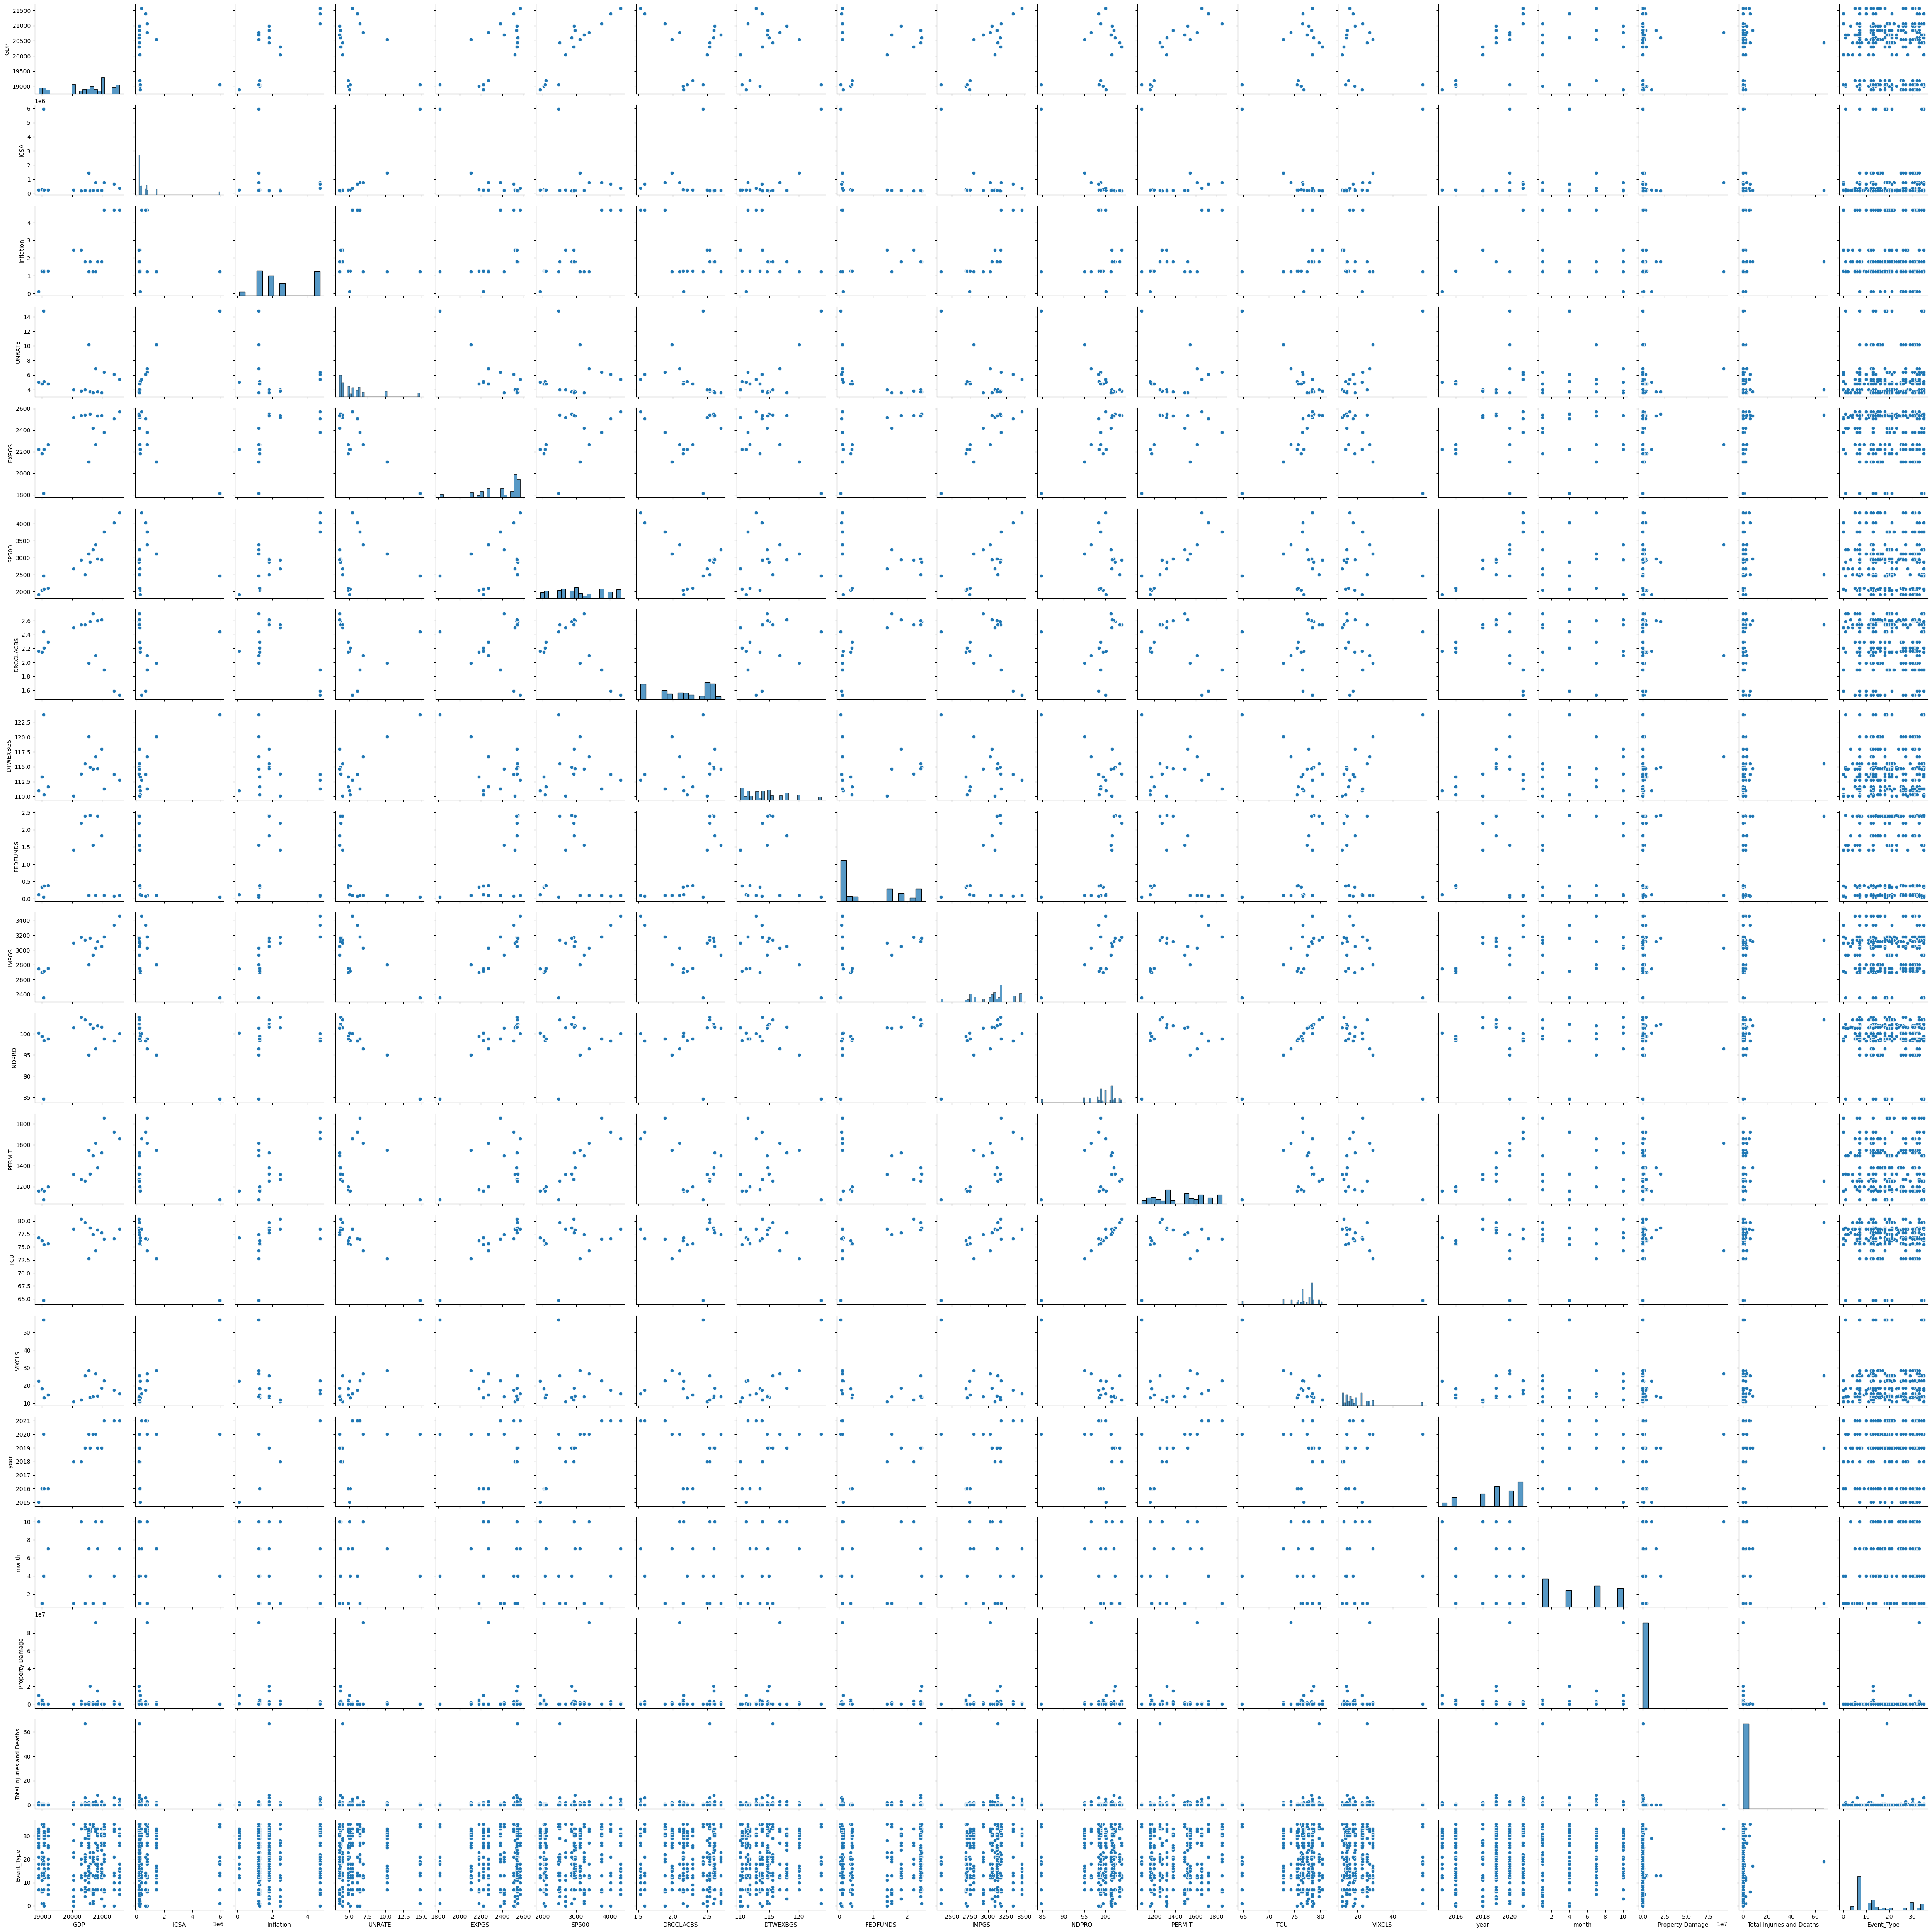

In [567]:
sns.pairplot(combined_final)

wooo that a lot

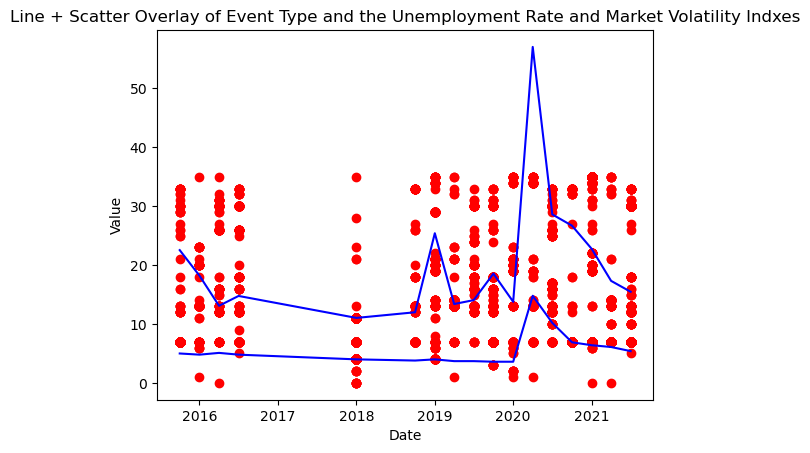

In [600]:
plt.plot(combined_final.index, combined_final[['UNRATE', 'VIXCLS']], label='Line', color='blue')           
plt.scatter(combined_final.index, combined['Event_Type'], label='Points', color='red')       
plt.title('Line + Scatter Overlay of Event Type and the Unemployment Rate and Market Volatility Indxes')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


This was worth a try, I will do some more graphs to try to visualize the relationship between event types and index fluctuations. Maybe I will try different colored dots for each event type (same with lines and indexes). 

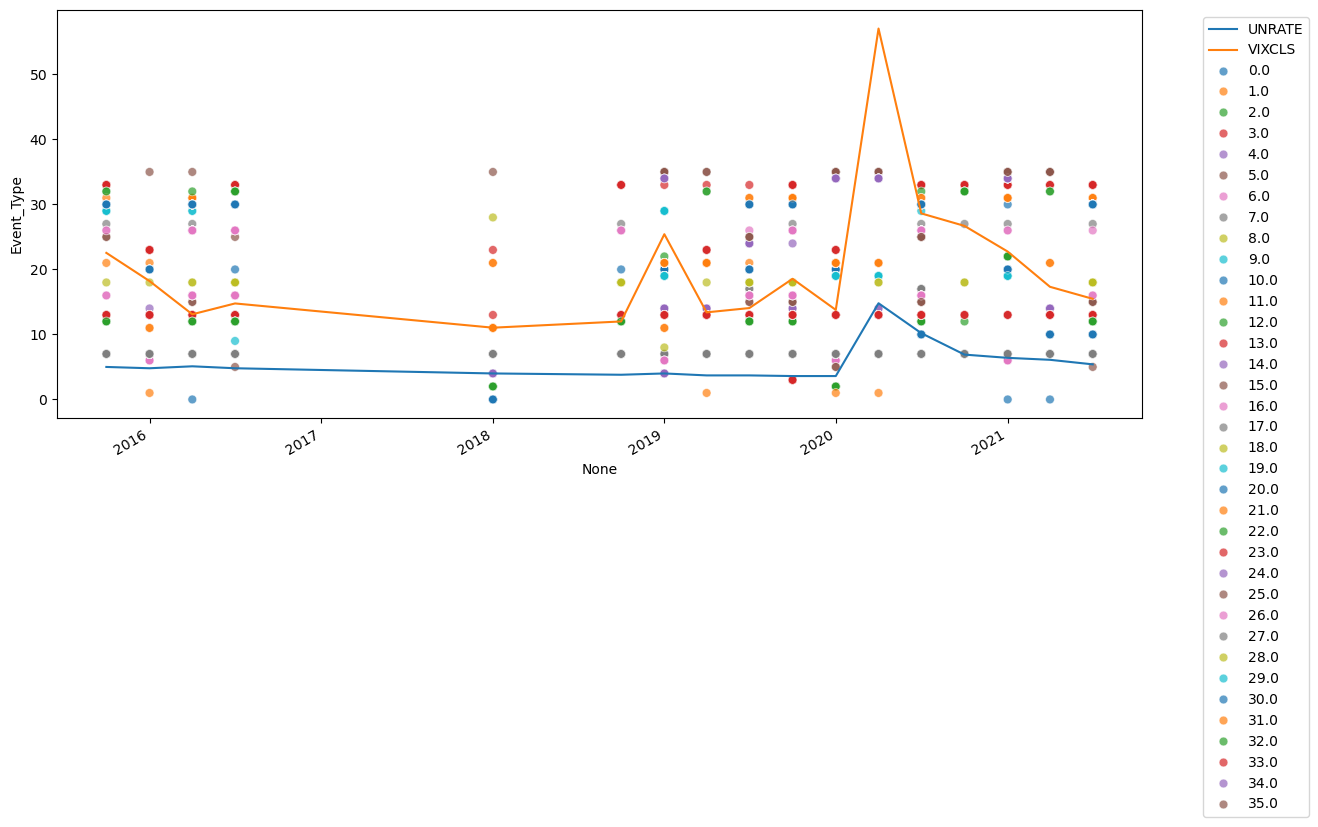

In [631]:
combined_final[['UNRATE', 'VIXCLS']].plot(figsize=(14, 6))
sns.scatterplot(
    x=combined_final.index,
    y='Event_Type',
    hue='Event_Type',
    data=combined_final,
    palette='tab10',
    s=40,
    alpha=0.7,
    legend='full')
plt.legend(bbox_to_anchor=(1.05, 1))


This graph more shows the relationship between market insecurity and unemploment rate. I will look for more correlations between weather events, property damage, and market index changes in the modeling section of this project! Some of the columns in this dataset have much larger ranges than others, so overlaying graphs isn't great for visualization. In the next notebook I will start by exploring the changes and dynamics of each index individually. 